<a href="https://colab.research.google.com/github/chuan1215/DLI_GroupAG/blob/main/DLI_GroupAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT CSV FILES

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [3]:
data_path = "/content/drive/MyDrive/Colab Notebooks/dataset_phishing.csv"
df = pd.read_csv(data_path)

# Display dataset info
print("Initial dataset shape:", df.shape)
df.head();

Initial dataset shape: (11430, 89)


Data Cleaning

In [4]:
# Drop rows with missing values
df.dropna(inplace=True)
print("After dropping NA:", df.shape)

# Check if there are any categorical values that need encoding
print("Data types:\n", df.dtypes)

# Identify the label column (based on your output, it's likely 'status')
if 'class' in df.columns:
    df.rename(columns={'class': 'label'}, inplace=True)
elif 'status' in df.columns:
    df.rename(columns={'status': 'label'}, inplace=True)
else:
    raise KeyError("No target label column found. Please ensure the dataset has a 'class' or 'status' column.")

# Drop non-numeric and non-informative columns like 'url'
df.drop(columns=['url'], inplace=True, errors='ignore')

# Convert label column to binary (e.g., 'phishing' = 1, 'legitimate' = 0)
df['label'] = df['label'].map({'phishing': 1, 'legitimate': 0})

After dropping NA: (11430, 89)
Data types:
 url                object
length_url          int64
length_hostname     int64
ip                  int64
nb_dots             int64
                    ...  
web_traffic         int64
dns_record          int64
google_index        int64
page_rank           int64
status             object
Length: 89, dtype: object


Data Preparation

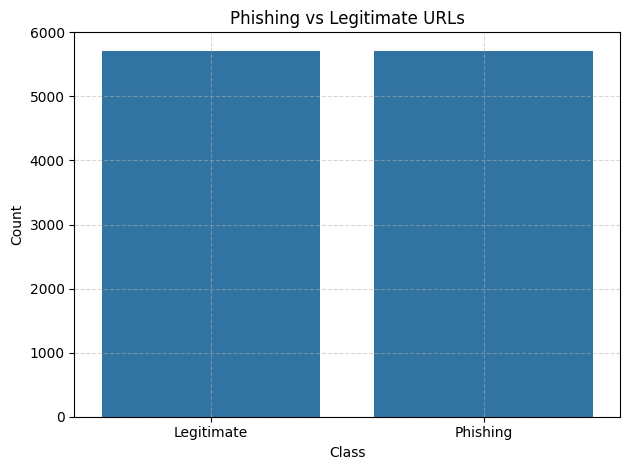

In [5]:
sns.countplot(data=df, x='label')
plt.title('Phishing vs Legitimate URLs')
plt.xticks([0, 1], ['Legitimate', 'Phishing'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Separate features and target
X = df.drop(columns=['label'])
y = df['label']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

LeeJinYao(FNN)

In [6]:
# === Split features and labels ===
X = df.drop('label', axis=1).values
y = df['label'].values

# === Normalize features ===
scaler = StandardScaler()
X = scaler.fit_transform(X)

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

# === Define model ===
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')   # binary classification
])

# === Compile ===
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# === Train ===
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# === Evaluate ===
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {acc:.4f}")

# === Predictions & report ===
y_pred = (model.predict(X_test) > 0.5).astype(int)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Training shape: (9144, 87)
Testing shape: (2286, 87)
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


286/286 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7731 - loss: 0.4746 - val_accuracy: 0.9479 - val_loss: 0.1546
Epoch 2/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9309 - loss: 0.1981 - val_accuracy: 0.9541 - val_loss: 0.1280
Epoch 3/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9399 - loss: 0.1668 - val_accuracy: 0.9593 - val_loss: 0.1188
Epoch 4/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9490 - loss: 0.1533 - val_accuracy: 0.9628 - val_loss: 0.1133
Epoch 5/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9508 - loss: 0.1408 - val_accuracy: 0.9606 - val_loss: 0.1105
Epoch 6/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9549 - loss: 0.1408 - val_accuracy: 0.9654 - val_loss: 0.1036
Epoch 7/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9559 - loss: 0.1262 - val_accuracy: 0.9668 - val_loss: 0.1037
Epoch 8/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9604 - loss: 0.1191 - val_accuracy: 0.9611 - val_

In [7]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 96.59%


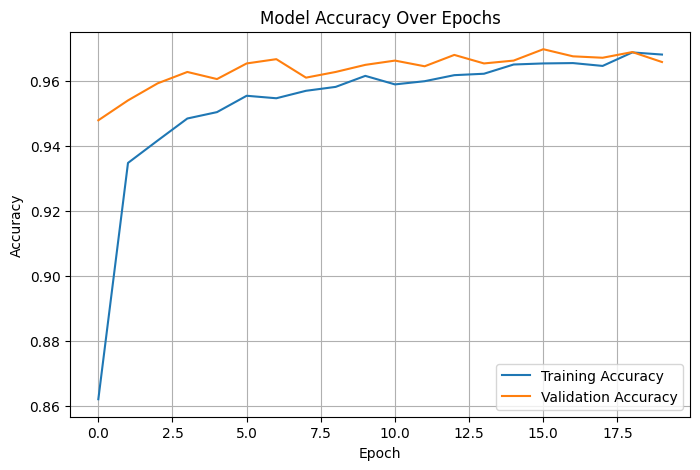

In [8]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


CNN - Faris

Data Preparation for CNN

In [9]:
X_cnn = X.reshape(X.shape[0], X.shape[1], 1)
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(
    X_cnn, y, test_size=0.2, random_state=42
)

Model Building

In [10]:
cnn_model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Training

In [11]:
cnn_history = cnn_model.fit(
    X_train_cnn, y_train_cnn,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_cnn, y_test_cnn),
    verbose=1
)

Epoch 1/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.7715 - loss: 0.4709 - val_accuracy: 0.9147 - val_loss: 0.2316
Epoch 2/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8854 - loss: 0.2873 - val_accuracy: 0.9322 - val_loss: 0.1850
Epoch 3/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9039 - loss: 0.2411 - val_accuracy: 0.9431 - val_loss: 0.1516
Epoch 4/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9178 - loss: 0.2239 - val_accuracy: 0.9488 - val_loss: 0.1457
Epoch 5/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9220 - loss: 0.2017 - val_accuracy: 0.9501 - val_loss: 0.1417
Epoch 6/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9302 - loss: 0.1940 - val_accuracy: 0.9479 - val_loss: 0.1430
Epoch 7/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9263 - loss: 0.1969 - val_accuracy: 0.9536 - val_loss: 0.1330
Epoch 8/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9275 - loss: 0.1853 - val_acc

Model Evaluation

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9644 - loss: 0.1210
✅ CNN Test Accuracy: 96.06%
✅ CNN Test Loss: 0.1205
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Classification Report (CNN):
              precision    recall  f1-score   support

  Legitimate       0.96      0.96      0.96      1157
    Phishing       0.96      0.96      0.96      1129

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



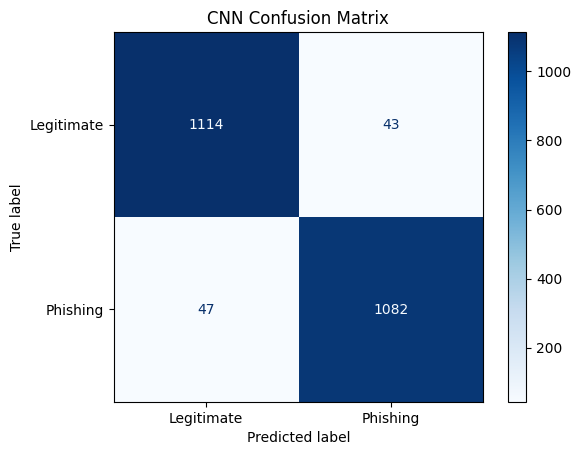

In [12]:
loss, accuracy = cnn_model.evaluate(X_test_cnn, y_test_cnn)
print(f"✅ CNN Test Accuracy: {accuracy * 100:.2f}%")
print(f"✅ CNN Test Loss: {loss:.4f}")

# Predictions
y_pred_prob_cnn = cnn_model.predict(X_test_cnn).ravel()
y_pred_cnn = (y_pred_prob_cnn > 0.5).astype("int32")

# Classification Report
print("\nClassification Report (CNN):")
print(classification_report(y_test_cnn, y_pred_cnn, target_names=["Legitimate", "Phishing"]))

# Confusion Matrix
cm_cnn = confusion_matrix(y_test_cnn, y_pred_cnn)
disp_cnn = ConfusionMatrixDisplay(confusion_matrix=cm_cnn, display_labels=["Legitimate", "Phishing"])
disp_cnn.plot(cmap=plt.cm.Blues)
plt.title("CNN Confusion Matrix")
plt.show()

Performance Visualization

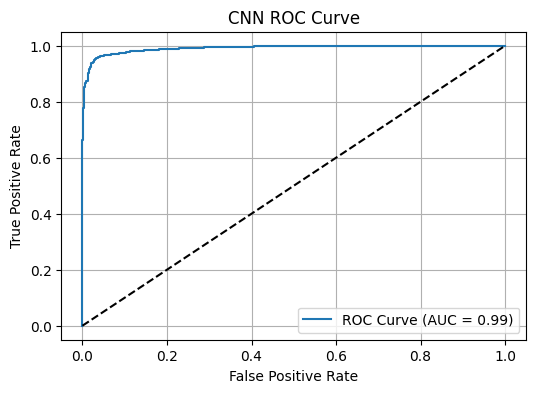

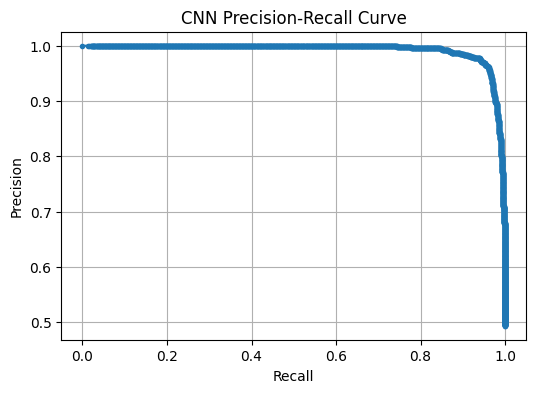

In [13]:
# ROC Curve
fpr_cnn, tpr_cnn, _ = roc_curve(y_test_cnn, y_pred_prob_cnn)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)
plt.figure(figsize=(6,4))
plt.plot(fpr_cnn, tpr_cnn, label=f'ROC Curve (AUC = {roc_auc_cnn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Precision-Recall Curve
precision_cnn, recall_cnn, _ = precision_recall_curve(y_test_cnn, y_pred_prob_cnn)
plt.figure(figsize=(6,4))
plt.plot(recall_cnn, precision_cnn, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('CNN Precision-Recall Curve')
plt.grid(True)
plt.show()

**TANG SI CHUON - Deep Neural Network (DNN)**

Create DNN Model

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Input

# Define the model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer
    Dense(128, activation='relu'),
    Dropout(0.3),  # Regularization to prevent overfitting
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.3),
    Dense(32, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Train DNN Model

In [15]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20,
                    batch_size=32,
                    verbose=1)

Epoch 1/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8369 - loss: 0.3754 - val_accuracy: 0.9567 - val_loss: 0.1298
Epoch 2/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9379 - loss: 0.1694 - val_accuracy: 0.9584 - val_loss: 0.1202
Epoch 3/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9509 - loss: 0.1422 - val_accuracy: 0.9619 - val_loss: 0.1032
Epoch 4/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9534 - loss: 0.1339 - val_accuracy: 0.9628 - val_loss: 0.1036
Epoch 5/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9560 - loss: 0.1207 - val_accuracy: 0.9646 - val_loss: 0.1013
Epoch 6/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9577 - loss: 0.1165 - val_accuracy: 0.9668 - val_loss: 0.0960
Epoch 7/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9610 - loss: 0.1108 - val_accuracy: 0.9668 - val_loss: 0.0934
Epoch 8/20
286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9644 - loss: 0.1052 - val_accuracy: 0.

Evaluate Peformance for DNN Model

In [16]:
# Evaluate on test set
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc*100:.4f}%")

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))



Test Accuracy: 96.8941%
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[1127   30]
 [  41 1088]]
              precision    recall  f1-score   support

           0     0.9649    0.9741    0.9695      1157
           1     0.9732    0.9637    0.9684      1129

    accuracy                         0.9689      2286
   macro avg     0.9690    0.9689    0.9689      2286
weighted avg     0.9690    0.9689    0.9689      2286



Confusion Matrix for DNN Model

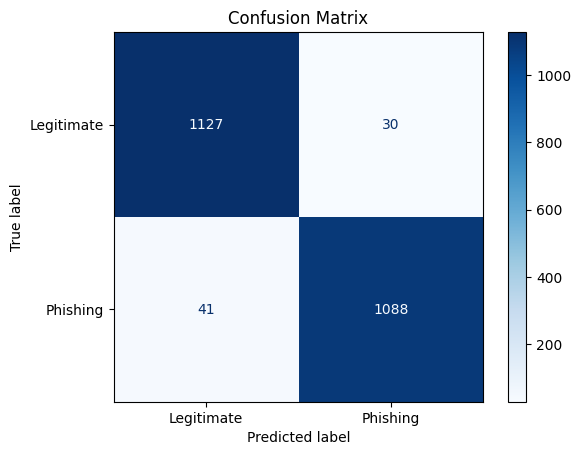

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Legitimate', 'Phishing'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Accuracy & Loss Curves for DNN Model

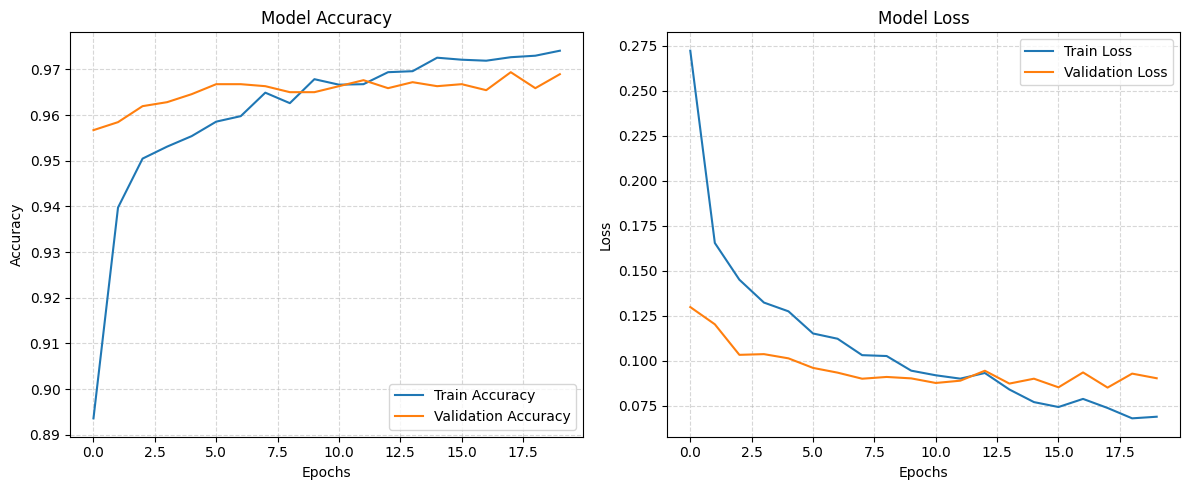

In [18]:
# Plot training history
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Precision-Recall Curve for DNN Model

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


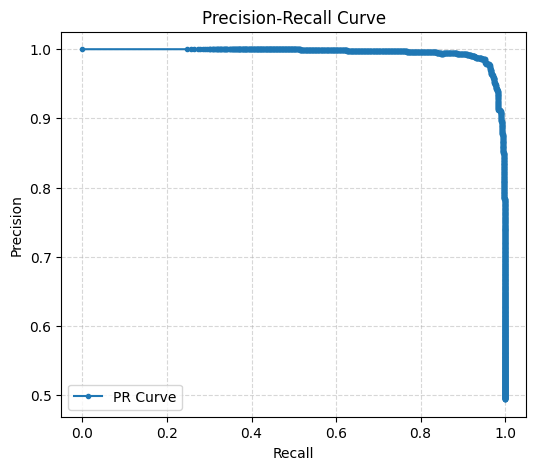

In [19]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Get predicted probabilities for positive class
y_pred_proba = model.predict(X_test).ravel()

# === Precision-Recall Curve ===
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, marker='.', label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

ROC Curve

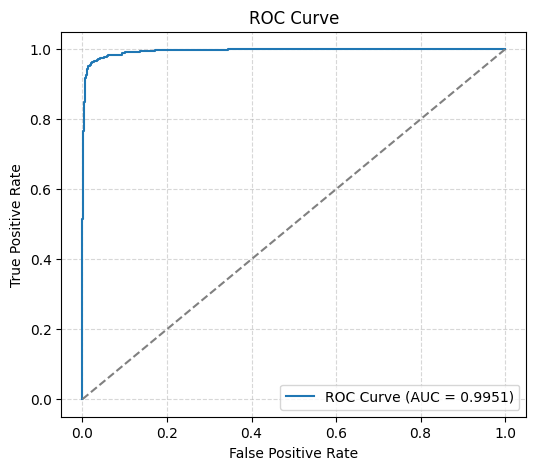

In [20]:
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

Lau Yong Feng(ANN)

Create ANN Model

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import tensorflow as tf
from tensorflow.keras.layers import Input # Import Input

# Check class imbalance
unique_classes, class_counts = np.unique(y_train, return_counts=True)
class_weights = 'balanced' if max(class_counts) / min(class_counts) > 1.5 else None
print("[INFO] Class weight setting:", class_weights)

# Define the ANN model
ann_model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Explicit Input layer
    Dense(128, activation='relu'),
    Dropout(0.3),  # Regularization to prevent overfitting
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.3),
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the ANN model
ann_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Train the ANN model
history = ann_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the ANN model
loss, accuracy = ann_model.evaluate(X_test, y_test, verbose=0)
print("\nAccuracy:", accuracy)

# Predictions
y_pred_prob = ann_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

[INFO] Class weight setting: None
Epoch 1/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8167 - loss: 0.3994 - val_accuracy: 0.9448 - val_loss: 0.1518
Epoch 2/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9366 - loss: 0.1695 - val_accuracy: 0.9535 - val_loss: 0.1388
Epoch 3/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9440 - loss: 0.1506 - val_accuracy: 0.9541 - val_loss: 0.1324
Epoch 4/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9503 - loss: 0.1391 - val_accuracy: 0.9535 - val_loss: 0.1319
Epoch 5/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9489 - loss: 0.1255 - val_accuracy: 0.9546 - val_loss: 0.1243
Epoch 6/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9624 - loss: 0.1133 - val_accuracy: 0.9524 - val_loss: 0.1284
Epoch 7/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9585 - loss: 0.1092 - val_accuracy: 0.9584 - val_loss: 0.1228
Epoch 8/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9631

Plot Training History For ANN

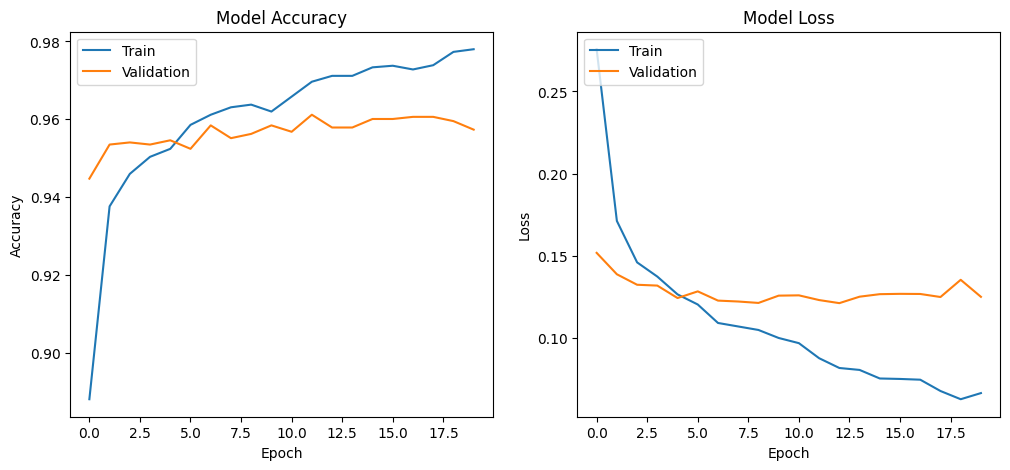

In [22]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Confusion Matrix For ANN Model

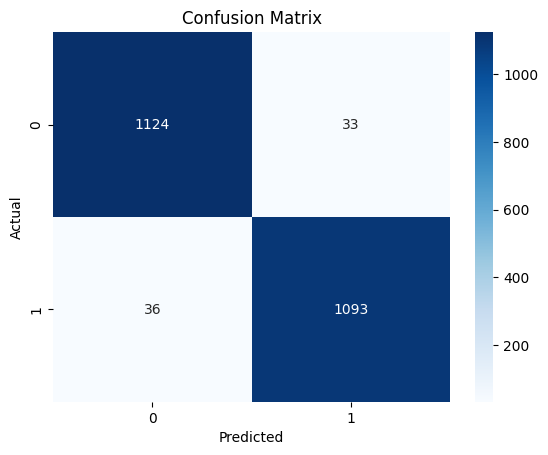

In [23]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Precision-Recall Curve For ANN Model

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


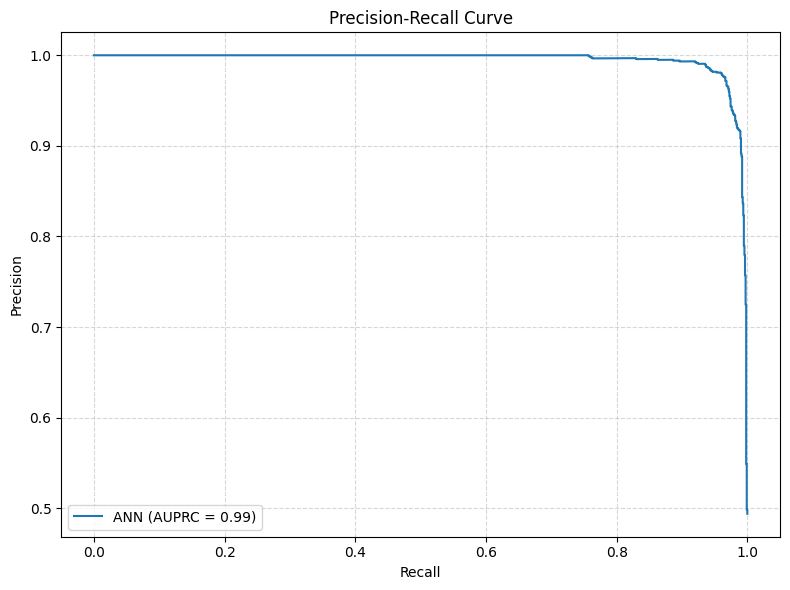

In [24]:
from sklearn.metrics import precision_recall_curve, auc

# Get precision and recall values for the ANN model
y_scores_ann = ann_model.predict(X_test).ravel()  # Probability of the positive class
precision_ann, recall_ann, _ = precision_recall_curve(y_test, y_scores_ann)

# Calculate the Area Under the PR Curve (AUPRC)
auprc_ann = auc(recall_ann, precision_ann)

# Plot the PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall_ann, precision_ann, label=f'ANN (AUPRC = {auprc_ann:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

ROC Curve For ANN Model

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


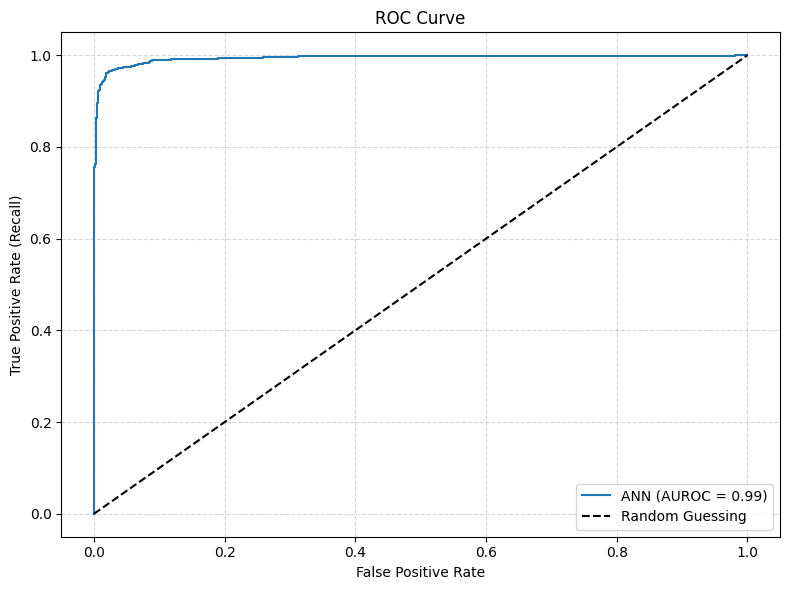

In [25]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_scores_ann = ann_model.predict(X_test).ravel()

# Calculate ROC curve
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_scores_ann)

# Calculate Area Under the ROC Curve (AUROC)
auroc_ann = auc(fpr_ann, tpr_ann)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_ann, tpr_ann, label=f'ANN (AUROC = {auroc_ann:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Support Vector Machines (SVM) YAP JIN CHENG

IMPORTS AND SETUP

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("✅ All imports loaded successfully")

✅ All imports loaded successfully


SVM MODEL INITIALIZATION

In [27]:
def create_svm_model():
    """Create and return SVM model with optimal parameters"""
    return SVC(
        probability=True,  # Enable probability predictions
        random_state=42    # For reproducible results
    )

# Initialize the model
svm_model = create_svm_model()
print("✅ SVM model initialized")
print(f"Model parameters: {svm_model.get_params()}")

✅ SVM model initialized
Model parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


MODEL TRAINING

In [28]:
# Train the SVM model
print("🔄 Training SVM model...")
svm_model.fit(X_train, y_train)
print("✅ SVM model training complete!")

🔄 Training SVM model...
✅ SVM model training complete!


MODEL EVALUATION - ACCURACY

In [29]:
# Calculate accuracy
accuracy_svm = svm_model.score(X_test, y_test)
print(f"🎯 SVM Test Accuracy: {accuracy_svm * 100:.2f}%")


🎯 SVM Test Accuracy: 96.33%


GENERATE PREDICTIONS

In [30]:
# Generate predictions
print("🔄 Generating predictions...")
y_pred_svm = svm_model.predict(X_test)
y_pred_prob_svm = svm_model.predict_proba(X_test)[:, 1]  # Positive class probability

print(f"✅ Predictions generated for {len(y_pred_svm)} samples")
print(f"Prediction distribution: {dict(zip(*np.unique(y_pred_svm, return_counts=True)))}")


🔄 Generating predictions...
✅ Predictions generated for 2286 samples
Prediction distribution: {np.int64(0): np.int64(1161), np.int64(1): np.int64(1125)}


CLASSIFICATION REPORT

In [31]:
print("📊 CLASSIFICATION REPORT (SVM)")
print("=" * 50)
print(classification_report(
    y_test,
    y_pred_svm,
    target_names=["Legitimate", "Phishing"]
))

📊 CLASSIFICATION REPORT (SVM)
              precision    recall  f1-score   support

  Legitimate       0.96      0.97      0.96      1157
    Phishing       0.96      0.96      0.96      1129

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



CONFUSION MATRIX For SVM

<Figure size 800x600 with 0 Axes>

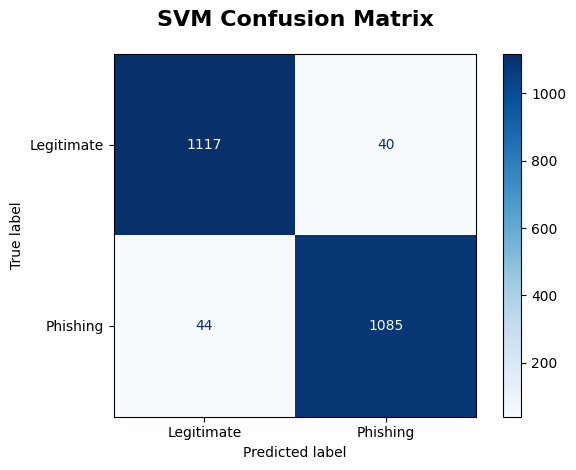

✅ Confusion Matrix plotted


In [32]:
# Create confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp_svm = ConfusionMatrixDisplay(
    confusion_matrix=cm_svm,
    display_labels=["Legitimate", "Phishing"]
)
disp_svm.plot(cmap='Blues')
plt.title("SVM Confusion Matrix", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print(f"✅ Confusion Matrix plotted")

ROC Curve For SVM Model

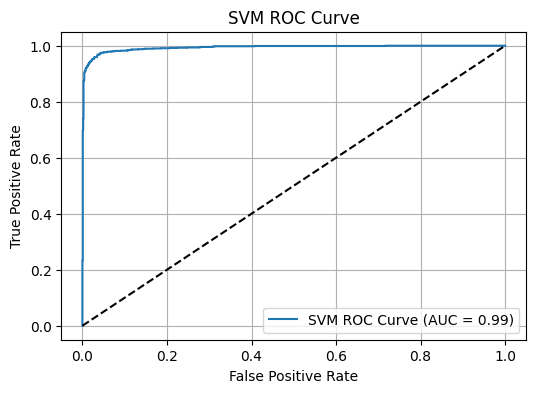

In [33]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# ROC Curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.figure(figsize=(6,4))
plt.plot(fpr_svm, tpr_svm, label=f'SVM ROC Curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Precision-Recall Curve For SVM Model

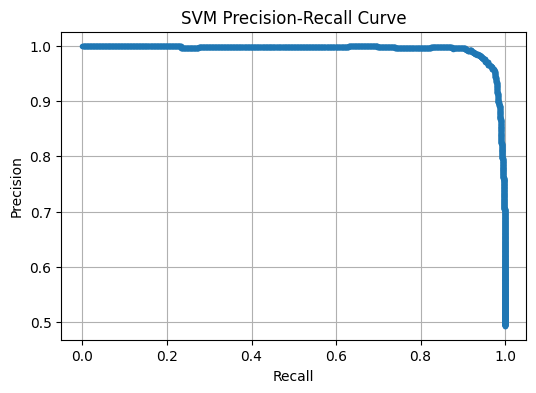

In [34]:
# Precision-Recall Curve for SVM
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_pred_prob_svm)
plt.figure(figsize=(6,4))
plt.plot(recall_svm, precision_svm, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('SVM Precision-Recall Curve')
plt.grid(True)
plt.show()

In [42]:
# Save the LeeJinYao(FNN) model as .pkl (using joblib for compatibility if needed)
import joblib
joblib.dump(model, '/content/drive/MyDrive/Colab Notebooks/fnn_model.pkl')
print("FNN model saved successfully as .pkl!")

FNN model saved successfully as .pkl!


In [43]:
# Save the CNN model as .pkl (using joblib for compatibility if needed)
import joblib
joblib.dump(cnn_model, '/content/drive/MyDrive/Colab Notebooks/cnn_model.pkl')
print("CNN model saved successfully as .pkl!")

CNN model saved successfully as .pkl!


In [44]:
# Save the TANG SI CHUON (DNN) model as .pkl (using joblib for compatibility if needed)
import joblib
joblib.dump(model, '/content/drive/MyDrive/Colab Notebooks/dnn_model.pkl')
print("DNN model saved successfully as .pkl!")

DNN model saved successfully as .pkl!


In [45]:
# Save the ANN model as .pkl
import joblib
joblib.dump(ann_model, '/content/drive/MyDrive/Colab Notebooks/ann_model.pkl')
print("ANN model saved successfully as .pkl!")

ANN model saved successfully as .pkl!


In [46]:
# Save the Support Vector Machines (SVM) model as .pkl
import joblib
joblib.dump(svm_model, '/content/drive/MyDrive/Colab Notebooks/svm_model.pkl')
print("SVM model saved successfully as .pkl!")

SVM model saved successfully as .pkl!
